## Overview
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps businesses better understand their customers and makes it easier for them to modify products according to the specific needs, behaviors, and concerns of different types of customers.

By leveraging customer personality analysis, businesses can tailor their products based on target customer segments. Instead of marketing a new product to every customer in the database, companies can analyze which customer segment is most likely to buy the product and focus their marketing efforts accordingly.

## Questions to Answer
1. Does the education level affect the number of accepted offers?  
2. Does marital status affect the number of accepted offers?  
3. Are customers with dependents more likely to accept an offer?  
4. Which age group is more likely to accept an offer?
5. What is the average number of days since the last purchase for customers who are more likely to accept an offer?
6. Are customers with higher incomes more likely to accept an offer?  
7. Are customers who spend more money more likely to accept an offer?  
8. Are customers who have a higher number of website visits and online purchases in the last month more likely to accept an offer?  
9. Are customers who have made more purchases in stores and through catalogs more likely to accept an offer?  
10. Are customers who frequently use discounts for purchases more likely to accept an offer?  
    
## Data Gathering
In this project, I will use a dataset downloaded from [Kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).  
The dataset consists of **29 columns** and **2,240 rows**.

> According to the information in this [link](https://github.com/nailson/ifood-data-business-analyst-test/tree/master), this dataset is used for hiring Data Analysts for the iFood Brain team. It was last updated on **February 19, 2020**.

## Columns Description

### Customer Information
- **ID**: Customer's unique identifier  
- **Year_Birth**: Customer's birth year  
- **Education**: Customer's education level  
- **Marital_Status**: Customer's marital status  
- **Income**: Customer's yearly household income  
- **Kidhome**: Number of children in the customer's household  
- **Teenhome**: Number of teenagers in the customer's household  
- **Dt_Customer**: Date of customer's enrollment with the company  
- **Recency**: Number of days since the customer's last purchase  
- **Complain**: `1` if the customer complained in the last 2 years, `0` otherwise  

### Spending Behavior
- **MntWines**: Amount spent on wine in the last 2 years  
- **MntFruits**: Amount spent on fruits in the last 2 years  
- **MntMeatProducts**: Amount spent on meat in the last 2 years  
- **MntFishProducts**: Amount spent on fish in the last 2 years  
- **MntSweetProducts**: Amount spent on sweets in the last 2 years  
- **MntGoldProds**: Amount spent on gold in the last 2 years  

### Purchase Behavior
- **NumDealsPurchases**: Number of purchases made with a discount  
- **NumWebPurchases**: Number of purchases made through the company’s website  
- **NumCatalogPurchases**: Number of purchases made using a catalog  
- **NumStorePurchases**: Number of purchases made directly in stores  
- **NumWebVisitsMonth**: Number of visits to the company’s website in the last month  

### Campaign Response
- **AcceptedCmp1**: `1` if the customer accepted the offer in the 1st campaign, `0` otherwise  
- **AcceptedCmp2**: `1` if the customer accepted the offer in the 2nd campaign, `0` otherwise  
- **AcceptedCmp3**: `1` if the customer accepted the offer in the 3rd campaign, `0` otherwise  
- **AcceptedCmp4**: `1` if the customer accepted the offer in the 4th campaign, `0` otherwise  
- **AcceptedCmp5**: `1` if the customer accepted the offer in the 5th campaign, `0` otherwise  
- **Response**: `1` if the customer accepted the offer in the last campaign, `0` otherwise  


## Data Assessing

- The **`Income`** column contains **13 null values**.  
- The **`Dt_Customer`** column needs to be converted to the **Date** type.  
- **Unnecessary columns** for analysis: `Z_costContact`, `Z_revenue`.
- The `Complain` Column has only 7 complaints so I don't think it could help my analysis.

## Data Cleaning


1. **Drop rows with missing values** in the **`Income`** column.  
   - Since there are only **13 null values**, which represent a very small proportion of the dataset, removing them is unlikely to significantly affect the analysis results.  

2. **Convert the data type** of the **`Dt_Customer`** column to **Date** type.  
   - When I tried to change the type directly, I encountered an error because the data follows the **day-month-year** format. To resolve this, I converted it using the **Brazilian locale**, as this dataset is related to a food delivery app in Brazil, and it worked.  

3. **Drop unnecessary columns** for analysis: `Z_costContact`, `Z_revenue`.  

4. **Create a new column** named `AcceptedCmp`, which represents the number of offers the customer has accepted, excluding the last campaign.
5. **Create a new column** named `Customer Age` to represent the customer's age.  
   - Since the data was last updated in 2020, I calculated the customer's age by subtracting their year of birth from 2020.
   - After creating the column I found 3 customers with ages of more than 100 so, I deleted those values.

6. **Create a new column** named `Age Group` that categorizes age into three groups: `24-44`, `45-65`, and `65 and Over`.

7. There were duplicate rows, so I removed them.

8. The `Marital_Status` column has some unusual values, such as `YOLO` and `Absurd`.  

   - There are only **two rows** with the value `YOLO`, and they contain identical information except for the `ID`. Therefore, I will drop them.  
   - There are also **two rows** with the value `Absurd`. Since I am unsure which category they belong to, I will drop them.  
   - There are **inconsistent values** such as `Alone` and `Single`, which have the same meaning. To maintain consistency, I will replace `Alone` with `Single`.
   - Now, we only have Single, Together, Married, Divorced, and Widow.
    
8. Create a new column called `Dependents` that represents the total number of dependents (kids + teenagers).

## Exploratory Data Analysis

#### How likely are customers who accepted previous offers to accept the next offer?
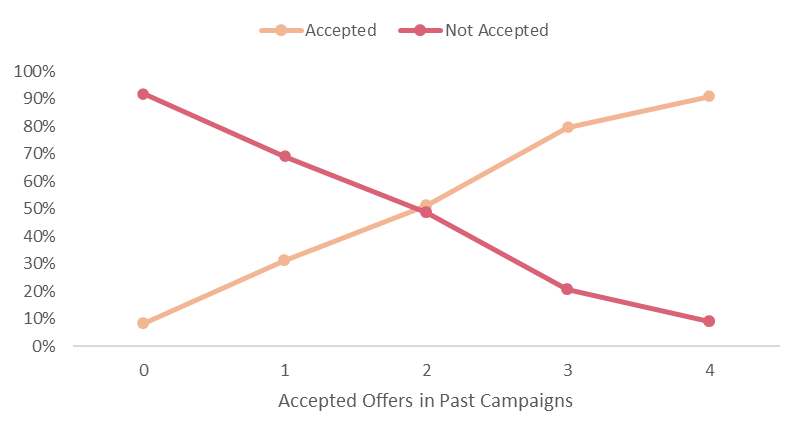

- As the number of accepted offers in past campaigns increases, the proportion of customers who accepted the last offer also increases.  
- Therefore, the more offers a customer has accepted in the past, the more likely they are to accept the next offer.

#### Does the education level affect the number of accepted offers?
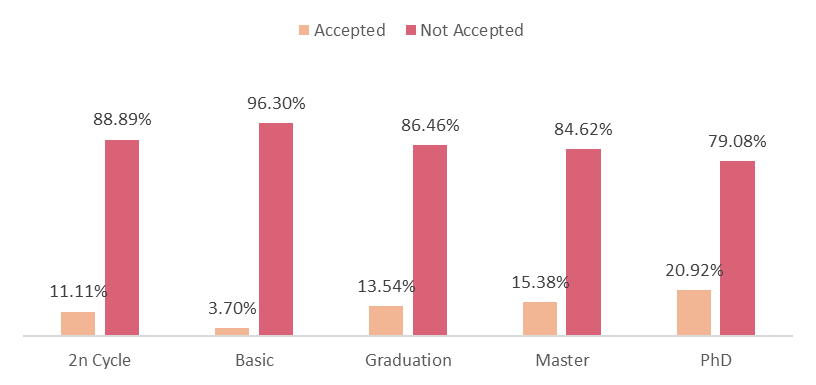
- We can see that the higher the customer's education level, the more likely they are to accept an offer.

#### Does marital status affect the number of accepted offers?
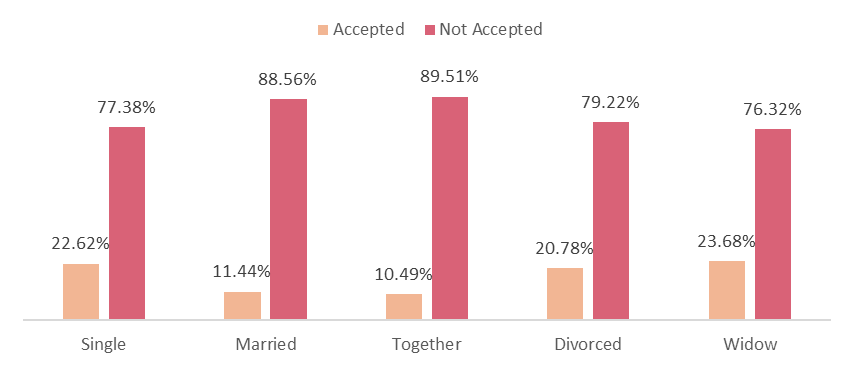
- We can see that customers who are not in a relationship are more likely to accept offers.

#### Are customers with dependents more likely to accept an offer?
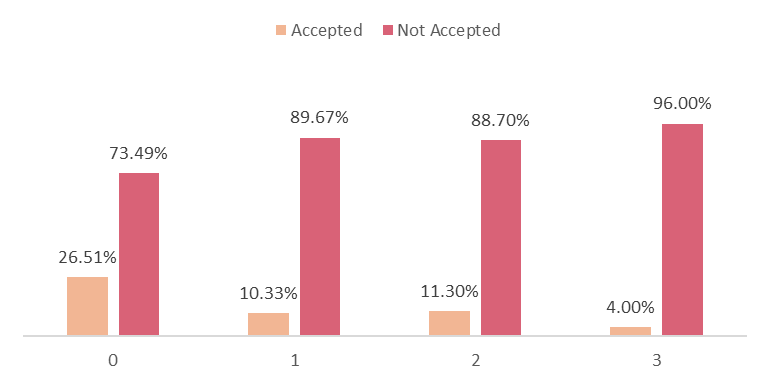
- Customers with dependents are less likely to accept an offer because, as the number of dependents increases, the proportion of customers who accepted an offer decreases.

#### Which age group is more likely to accept an offer?
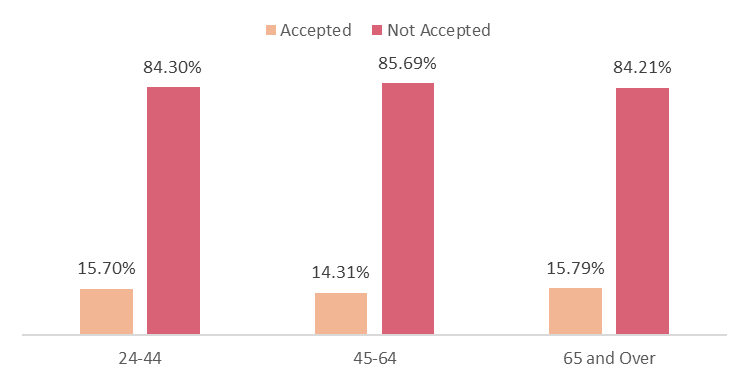
- If we look at the age groups, we can't conclude that any specific age group accepts offers more than others.

#### What is the average number of days since the last purchase for customers who are more likely to accept an offer?

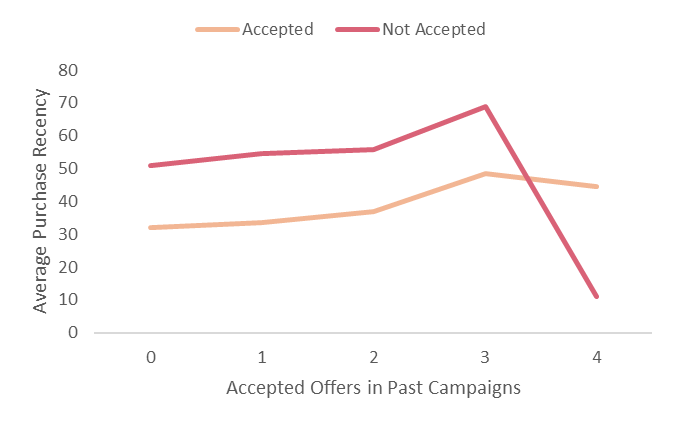

- For customers who accepted **three or fewer** offers in previous campaigns, the average number of days since their last purchase is **lower** for those who accepted the last offer than for those who didn't.  
- However, for customers who accepted **four** offers, the average number of days since their last purchase is **higher** for those who accepted the last offer than for those who didn't.  
- **Recommendation**: In the next campaign, target:  
  - Customers who accepted **fewer than three** offers and made their last purchase **within the last 40 days**.  
  - Customers who accepted **four** offers and made their last purchase **more than 30 days ago**.

## Do customers who enroll with the company earlier more likely to accept an offer?
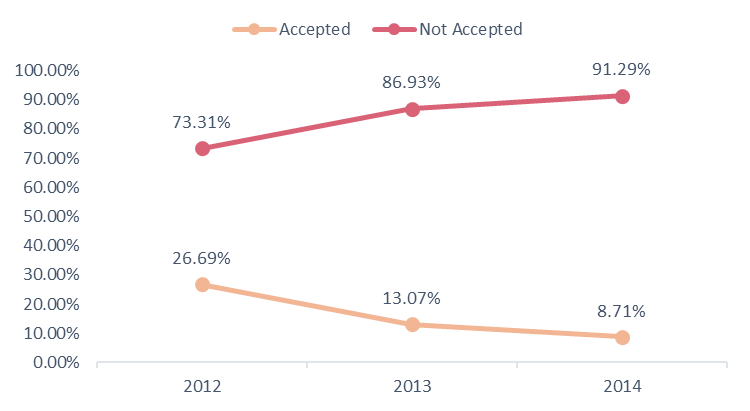
- Yes, the proportion of customers who enrolled with the company in 2012 and accepted the last offer is higher than the proportion for the other two years.

#### Are customers with higher incomes more likely to accept an offer?

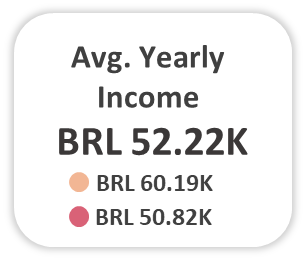

- The average income for all customers is **52.22K**.  
- For customers who accepted the last offer, the average income is **60.19K**, while for those who didn't, it is **50.82K**.  
- This indicates that customers who accepted the last offer tend to have a **higher average income** than those who didn't.

#### Are customers who spend more money more likely to accept an offer? 

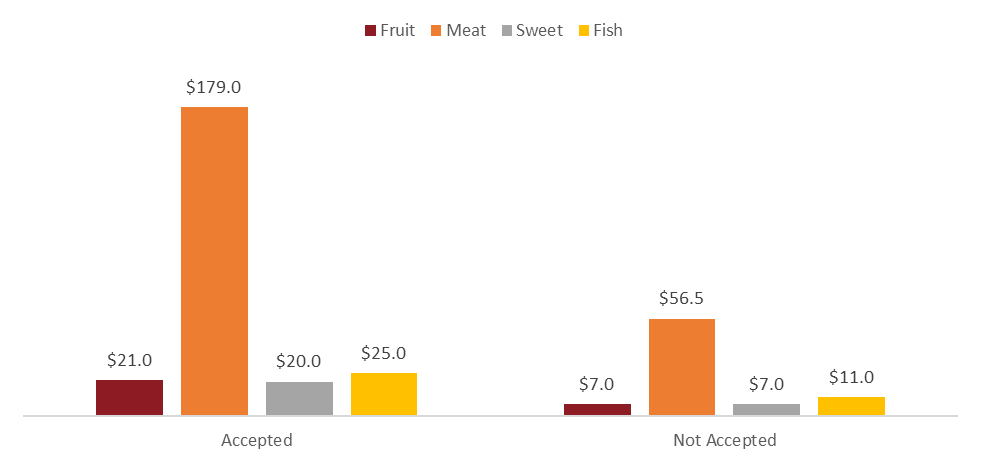
- In general, customers who accepted the last offer spend more than customers who didn't.

#### Are customers who have a higher number of website visits and online purchases in the last month more likely to accept an offer?

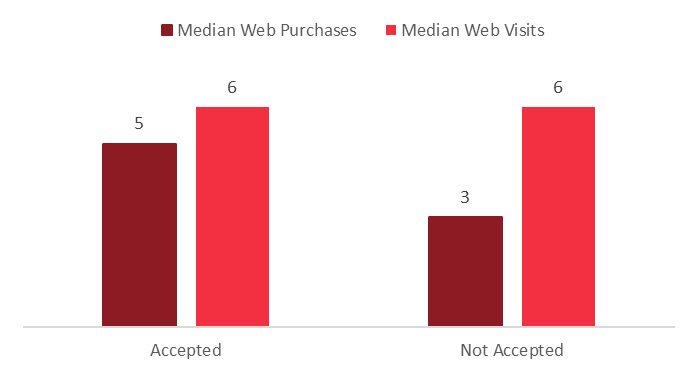
- The median number of visits to the website is similar for both those who accepted and those who did not accept the last offer. However, the median number of purchases made through the company's website is higher for those who accepted the last offer compared to those who didn't.

#### Are customers who have made more purchases in stores and through catalogs more likely to accept an offer?

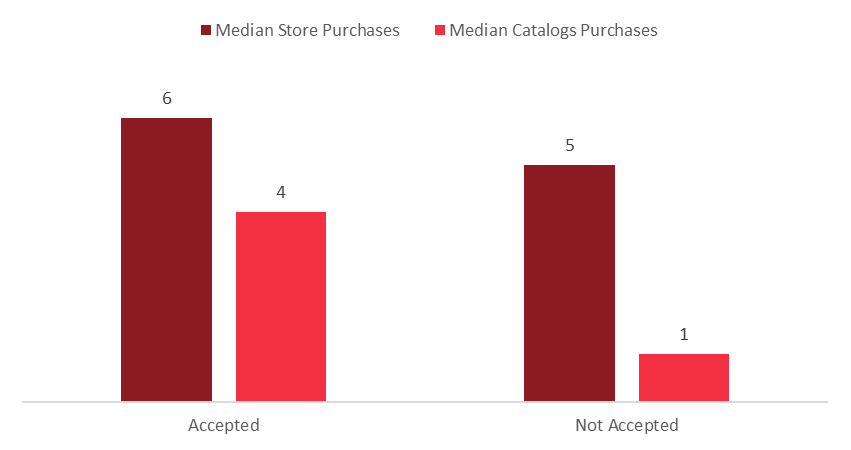
- Customers who accepted the last offer have a higher number of store/catalog purchases compared to those who did not accept the last offer.

#### Are customers who frequently use discounts for purchases more likely to accept an offer?

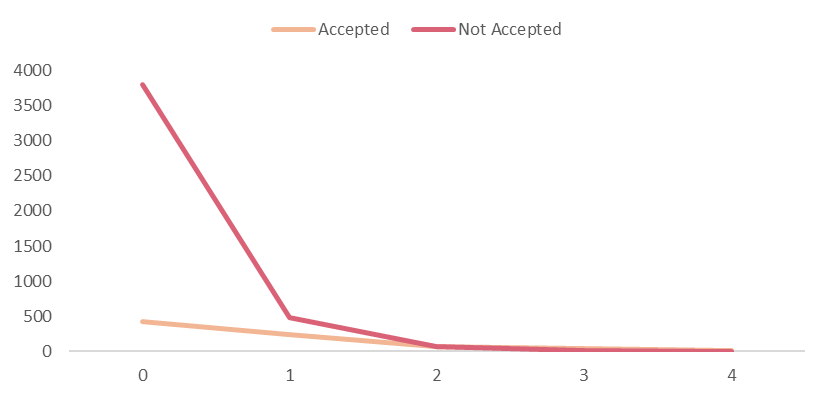
- People who made a high number of discount purchases did not accept the last offer or any previous offers. I believe these customers more likely to buy when there is a discount. Therefore, it would be more effective to provide offers with discounts for these customers.

# Conclusions
- As the number of accepted offers in past campaigns increases, the proportion of customers who accepted the last offer also increases. Therefore, the more offers a customer has accepted in the past, the more likely they are to accept the next offer.
- The higher the customer's education level, the more likely they will accept an offer.
- Customers who are not in a relationship are more likely to accept offers.
- Customers with dependents are less likely to accept an offer because, as the number of dependents increases, the proportion of customers who accepted an offer decreases.
- For customers who accepted three or fewer offers in previous campaigns, the average number of days since their last purchase is lower for those who accepted the last offer than for those who didn't.
- However, for customers who accepted four offers, the average number of days since their last purchase is higher for those who accepted the last offer than for those who didn't.
- Recommendation: In the next campaign, target:
    - Customers who accepted fewer than three offers and made their last purchase within the last 40 days.
    - Customers who accepted four offers and made their last purchase more than 30 days ago.
- The proportion of customers who enrolled with the company in 2012 and accepted the last offer is higher than the proportion for the other two years. Customers who enrolled earlier with the company are more likely to accept an offer.
- The average income for all customers is 52.22K.
- For customers who accepted the last offer, the average income is 60.19K, while for those who didn't, it is 50.82K. This indicates that customers who accepted the last offer tend to have a higher average income than those who didn't.
- The median number of visits to the website is similar for both those who accepted and those who did not accept the last offer. However, the median number of purchases made through the company's website is higher for those who accepted the last offer compared to those who didn't.
- Customers who accepted the last offer have a higher number of store/catalog purchases compared to those who did not accept the last offer.
- People who made a high number of discount purchases did not accept the last offer or any previous offers. I believe these customers are more likely to buy when there is a discount. Therefore, it would be more effective to provide offers with discounts for these customers.